In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [2]:
data = pd.read_csv('amazon_prime_titles.csv')

In [3]:
data.shape

(9668, 12)

In [4]:
data.describe

<bound method NDFrame.describe of      show_id     type                    title         director  \
0         s1    Movie      The Grand Seduction     Don McKellar   
1         s2    Movie     Take Care Good Night     Girish Joshi   
2         s3    Movie     Secrets of Deception      Josh Webber   
3         s4    Movie       Pink: Staying True   Sonia Anderson   
4         s5    Movie            Monster Maker     Giles Foster   
...      ...      ...                      ...              ...   
9663   s9664    Movie      Pride Of The Bowery  Joseph H. Lewis   
9664   s9665  TV Show            Planet Patrol              NaN   
9665   s9666    Movie                  Outpost     Steve Barker   
9666   s9667  TV Show  Maradona: Blessed Dream              NaN   
9667   s9668    Movie              Harry Brown    Daniel Barber   

                                                   cast         country  \
0        Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1      Mahe

In [5]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
data['director'].fillna("Unknown", inplace=True)

data['cast'].fillna("Unknown", inplace=True)

data['country'].fillna("Unkown", inplace=True)

data['date_added'].fillna("Unknown", inplace=True)

mode_rating = data['rating'].mode()[0]
data['rating'] = data['rating'].fillna(mode_rating)

C:\Users\archi\AppData\Local\Temp\ipykernel_13272\52352400.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['director'].fillna("Unknown", inplace=True)
C:\Users\archi\AppData\Local\Temp\ipykernel_13272\52352400.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [7]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

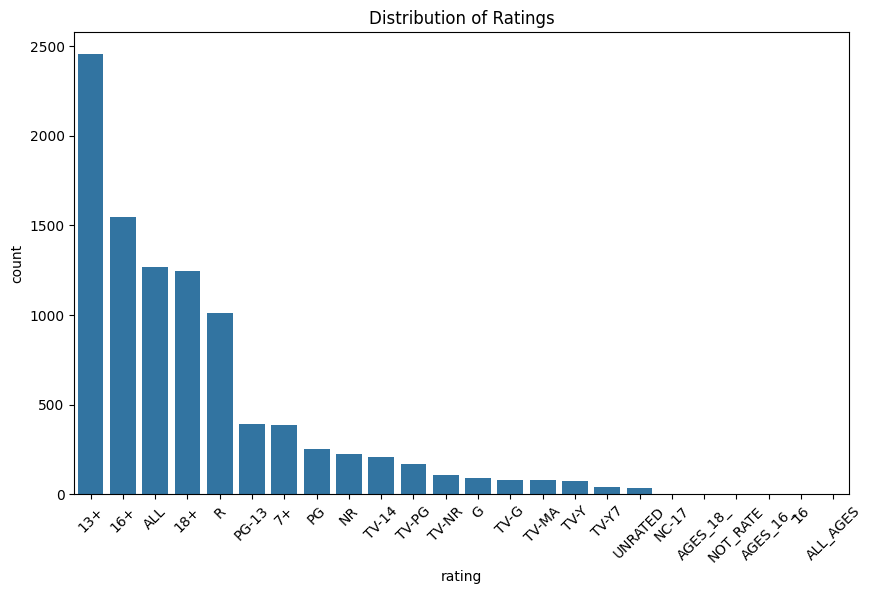

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='rating', order=data['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xticks(rotation=45)
plt.show()

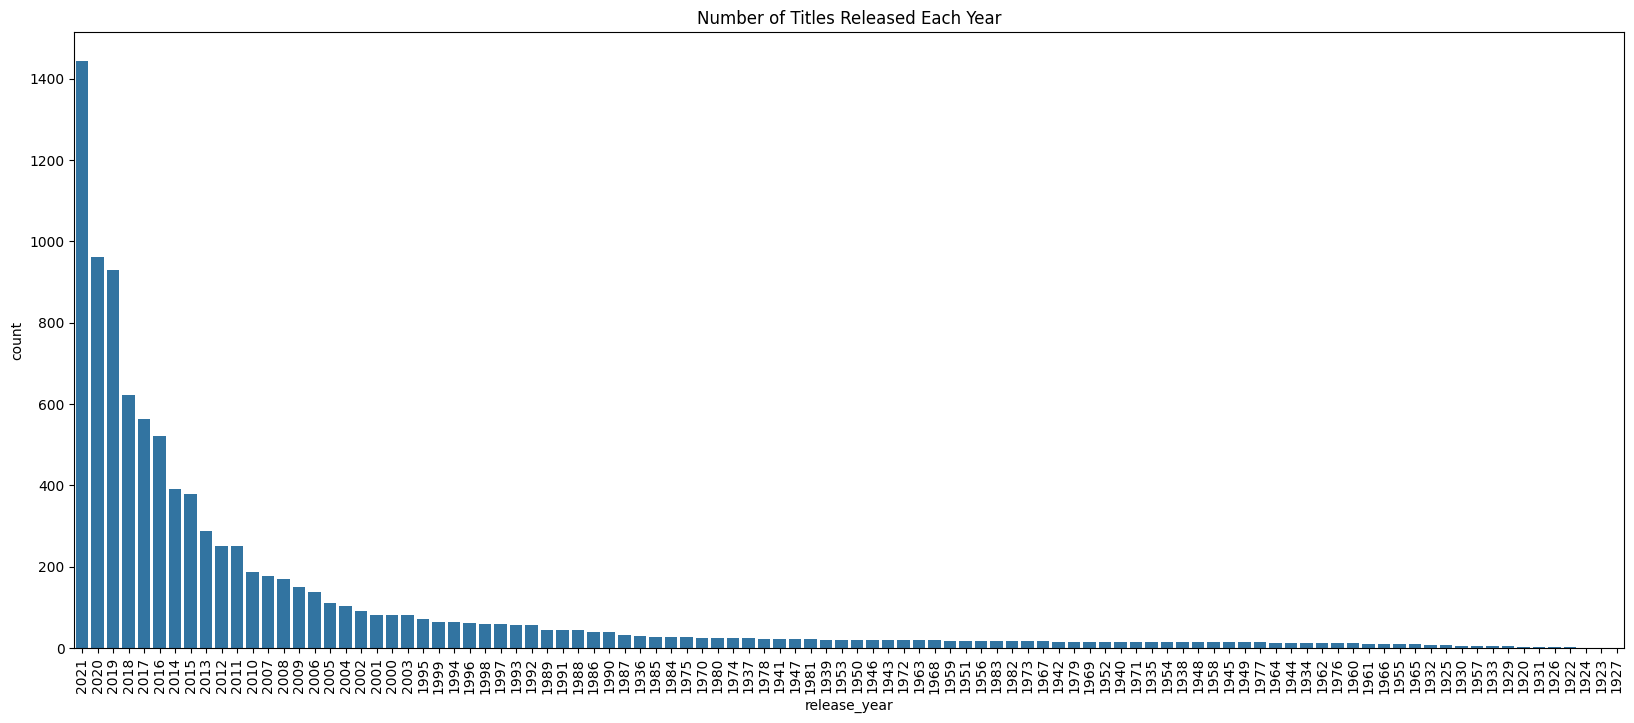

In [9]:
plt.figure(figsize=(20, 8))
sns.countplot(data=data, x='release_year', order=data['release_year'].value_counts().index)
plt.title('Number of Titles Released Each Year')
plt.xticks(rotation=90, fontsize=10)
plt.show()

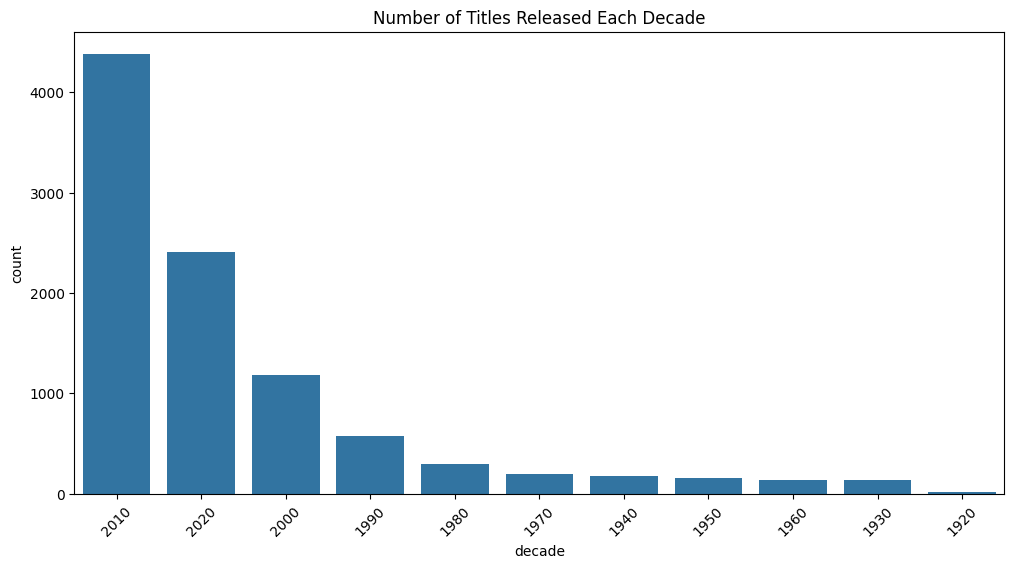

In [10]:
data['decade'] = (data['release_year'] // 10) * 10

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='decade', order=data['decade'].value_counts().index)
plt.title('Number of Titles Released Each Decade')
plt.xticks(rotation=45)
plt.show()


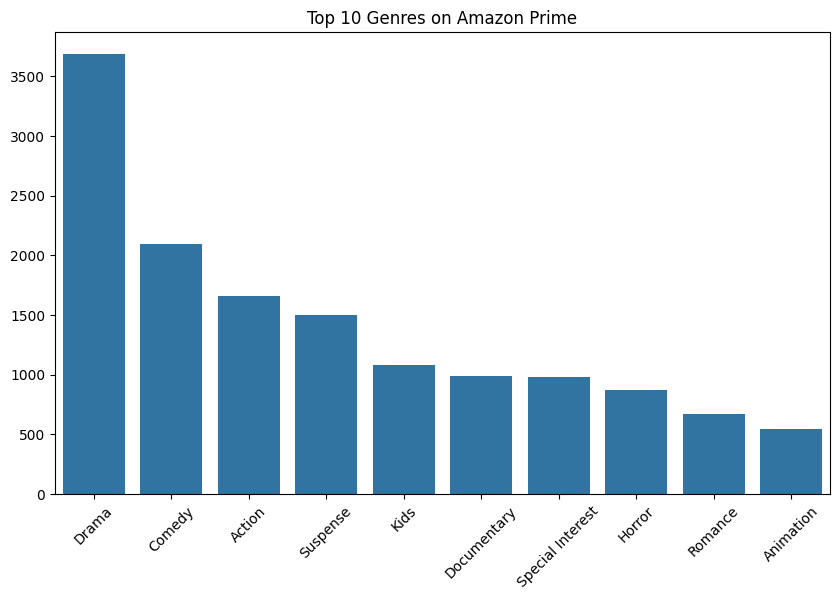

In [11]:
all_genres = data['listed_in'].str.split(',').apply(lambda x: [genre.strip() for genre in x]).explode()
genre_counts = Counter(all_genres)

top_genres = genre_counts.most_common(10)
genres, counts = zip(*top_genres)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(genres), y=list(counts))
plt.title('Top 10 Genres on Amazon Prime')
plt.xticks(rotation=45)
plt.show()

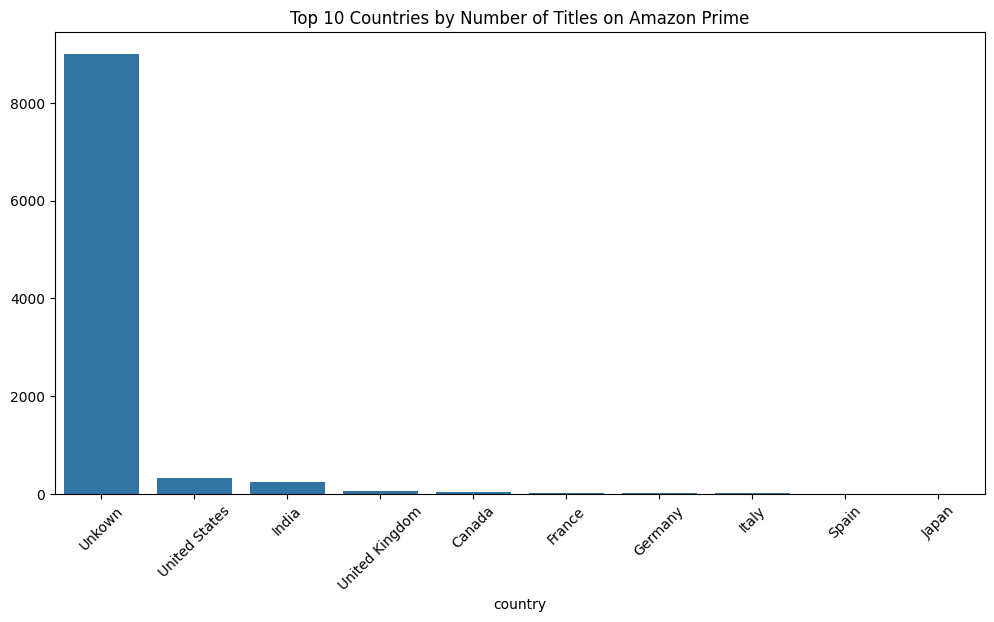

In [12]:
country_counts = data['country'].str.split(',').apply(lambda x: [country.strip() for country in x]).explode().value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index[:10], y=country_counts.values[:10])
plt.title('Top 10 Countries by Number of Titles on Amazon Prime')
plt.xticks(rotation=45)
plt.show()

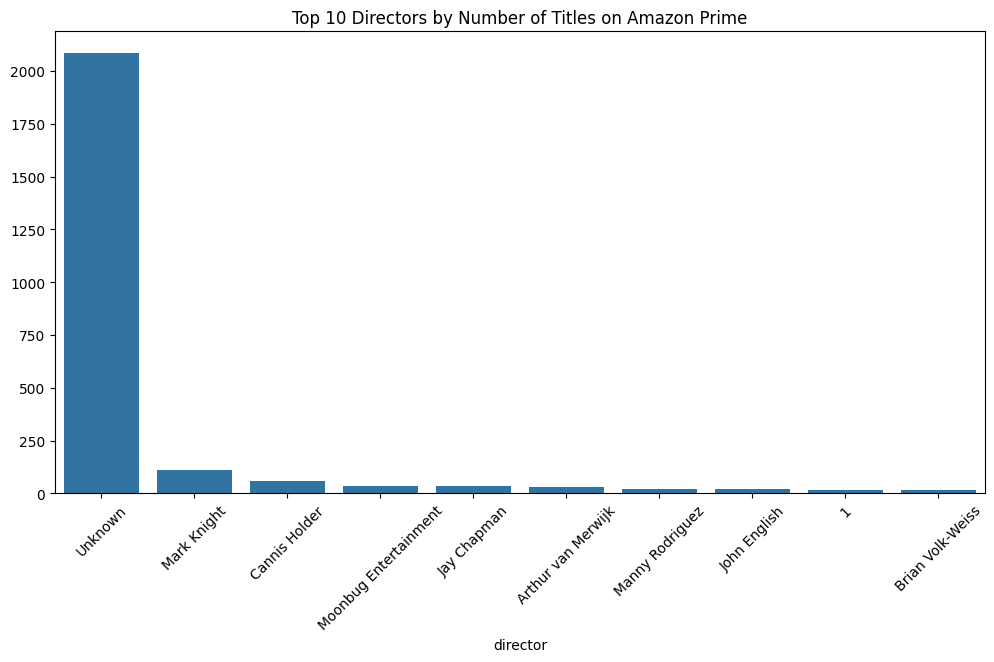

In [13]:
director_counts = data['director'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=director_counts.index[:10], y=director_counts.values[:10])
plt.title('Top 10 Directors by Number of Titles on Amazon Prime')
plt.xticks(rotation=45)
plt.show()

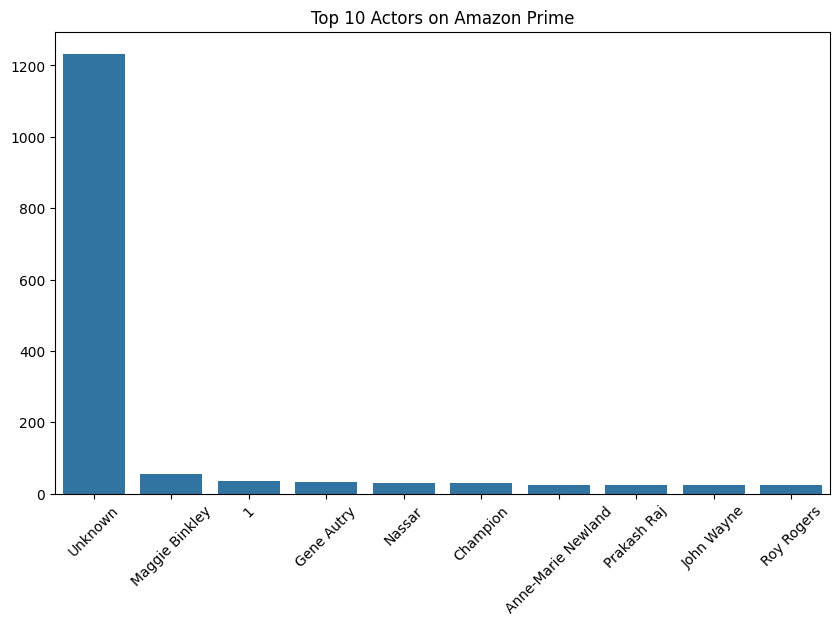

In [14]:
all_actors = data['cast'].str.split(',').apply(lambda x: [actor.strip() for actor in x]).explode()
actor_counts = Counter(all_actors)

top_actors = actor_counts.most_common(10)
actors, counts = zip(*top_actors)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(actors), y=list(counts))
plt.title('Top 10 Actors on Amazon Prime')
plt.xticks(rotation=45)
plt.show()

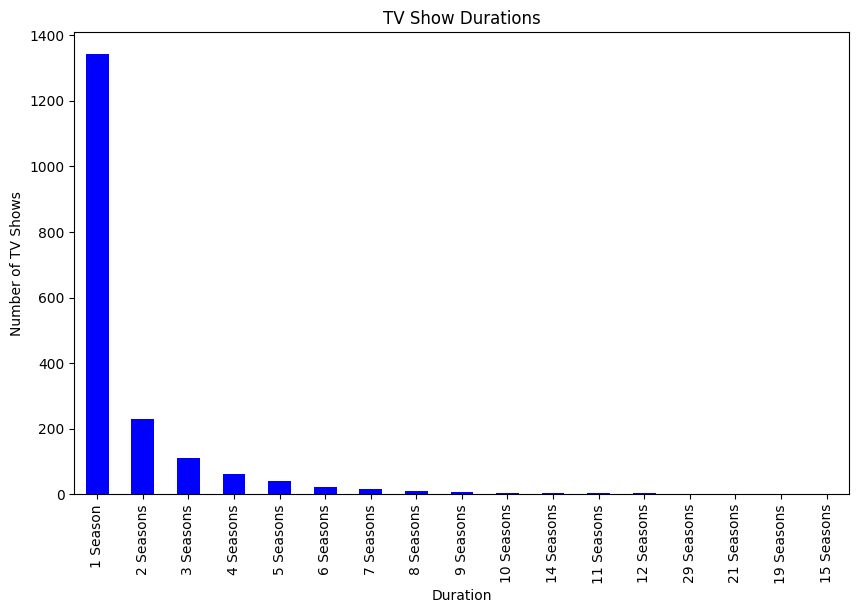

In [15]:
tv_shows = data[data['type'] == 'TV Show']

tv_shows_no_nan = tv_shows.dropna(subset=['duration'])

duration_counts = tv_shows_no_nan['duration'].value_counts()

plt.figure(figsize=(10, 6))
duration_counts.plot(kind='bar', color='blue')
plt.title('TV Show Durations')
plt.xlabel('Duration')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=90)
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\archi\AppData\Local\Temp\ipykernel_13272\893648067.py:5: SyntaxWarning: invalid escape sequence '\d'
  movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)


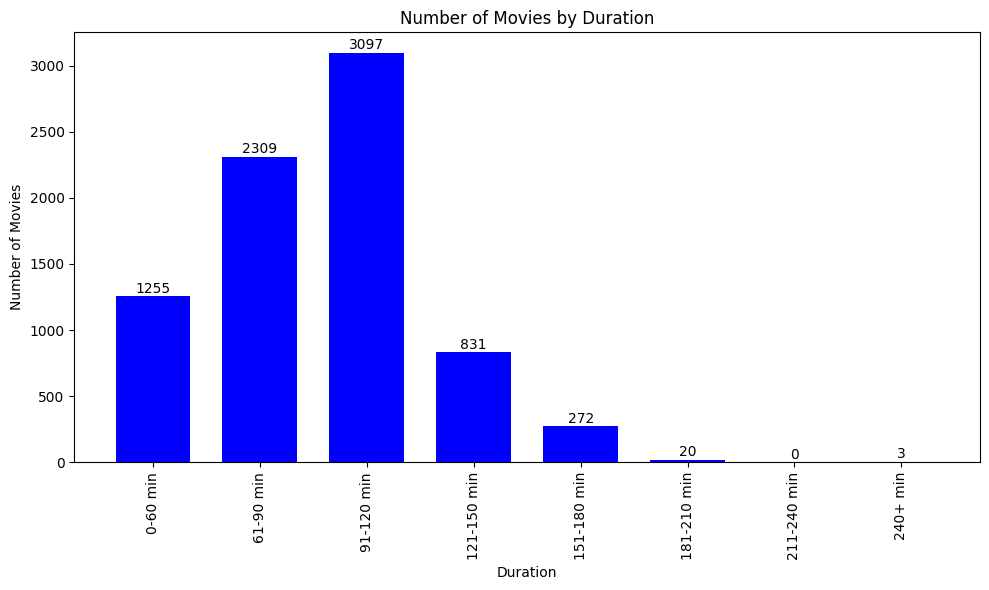

In [16]:
movies = data[data['type'] == 'Movie'].copy()

movies = movies.dropna(subset=['duration'])

movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)

bins = [0, 60, 90, 120, 150, 180, 210, 240, 300]
labels = ['0-60 min', '61-90 min', '91-120 min', '121-150 min', '151-180 min', '181-210 min', '211-240 min', '240+ min']
movies['duration_group'] = pd.cut(movies['duration_minutes'], bins=bins, labels=labels, right=False)

duration_group_counts = movies['duration_group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(duration_group_counts.index, duration_group_counts.values, color='blue', width=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

plt.xlabel('Duration')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Duration')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [17]:
movies = data[data['type'] == 'Movie'].dropna(subset=['duration']).copy()

movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)

average_duration = movies['duration_minutes'].mean()

print(f"The average duration of movies is approximately {average_duration:.2f} minutes.")

The average duration of movies is approximately 91.31 minutes.


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\archi\AppData\Local\Temp\ipykernel_13272\2945710963.py:3: SyntaxWarning: invalid escape sequence '\d'
  movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)


In [18]:
data = data.drop(columns=[col for col in data.columns if "Unnamed" in col])

tv_shows = data[data['type'] == 'TV Show'].dropna(subset=['duration']).copy()

tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(int)

average_seasons = tv_shows['seasons'].mean()

print(f"The average number of seasons for TV shows is approximately {average_seasons:.2f} seasons.")

The average number of seasons for TV shows is approximately 1.72 seasons.


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\archi\AppData\Local\Temp\ipykernel_13272\898976056.py:5: SyntaxWarning: invalid escape sequence '\d'
  tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(int)


In [19]:
data = data.drop(columns=[col for col in data.columns if "Unnamed" in col])

movies = data[data['type'] == 'Movie'].dropna(subset=['duration']).copy()

movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)

movies = movies[movies['duration_minutes'] > 0]

shortest_movies = movies.sort_values(by='duration_minutes').head(10)

for i, row in enumerate(shortest_movies.itertuples(index=False), start=1):
    print(f"{i}. {row.title} - {row.duration_minutes} minutes ({row.duration})")

1. One-Minute Anxiety Meditation - 1.0 minutes (1 min)
2. Clip: Validation Check CAPI - 1.0 minutes (1 min)
3. Image Test - 1.0 minutes (1 min)
4. A Shot In The Dark - 1.0 minutes (1 min)
5. IN and Classic - curation testing - 1.0 minutes (1 min)
6. Movie10y - 1.0 minutes (1 min)
7. Movie10x - 1.0 minutes (1 min)
8. Monster Truck Word Crusher Part 3 - 2.0 minutes (2 min)
9. Funny Lesson Learn Colors with Cows and Balls for Kids Colours with Animals - 2.0 minutes (2 min)
10. G19 - 2.0 minutes (2 min)


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\archi\AppData\Local\Temp\ipykernel_13272\3070168575.py:5: SyntaxWarning: invalid escape sequence '\d'
  movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)


In [20]:
movies = data[data['type'] == 'Movie'].dropna(subset=['duration']).copy()

movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)

longest_movies = movies[movies['duration_minutes'] > 0].sort_values(by='duration_minutes', ascending=False).head(10)

for i, row in enumerate(longest_movies.itertuples(index=False), start=1):
    print(f"{i}. {row.title} - {row.duration_minutes} minutes ({row.duration})")

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\archi\AppData\Local\Temp\ipykernel_13272\3412966154.py:3: SyntaxWarning: invalid escape sequence '\d'
  movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)


1. Soothing Surf at Del Norte for Sleep black screen - 601.0 minutes (601 min)
2. Himalayan Singing Bowls 9 hours - 550.0 minutes (550 min)
3. Gentle Midnight Rain black screen 9 hours - 541.0 minutes (541 min)
4. Gentle Tropical Rainstorm for Sleep 9 Hours - 541.0 minutes (541 min)
5. Thunderstorm for sleep black screen - 541.0 minutes (541 min)
6. Pacific Ocean Waves - 541.0 minutes (541 min)
7. Black Screen Ocean Waves for Sleep 9 hours - 541.0 minutes (541 min)
8. 9 Hour Rainstorm for Sleep black screen - 541.0 minutes (541 min)
9. New York City's 5th Avenue at Night for Sleep - 541.0 minutes (541 min)
10. Midnight Thunderstorm for Sleep 9 Hours - 541.0 minutes (541 min)
